In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_full.csv')
df.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


In [ ]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 88647, dtype: int64

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_full.csv')

# separate phishing and non-phishing data
phishing_data = data[data['phishing'] == 1]
legitimate_data = data[data['phishing'] == 0]

# define features and target variable
features = data.drop('phishing', axis=1)
target = data['phishing']

# train random forest classifier on phishing data and get feature importance
phishing_classifier = RandomForestClassifier()
phishing_classifier.fit(features, target)
phishing_feature_importance = phishing_classifier.feature_importances_

# train random forest classifier on legitimate data and get feature importance
legitimate_classifier = RandomForestClassifier()
legitimate_classifier.fit(features, target)
legitimate_feature_importance = legitimate_classifier.feature_importances_


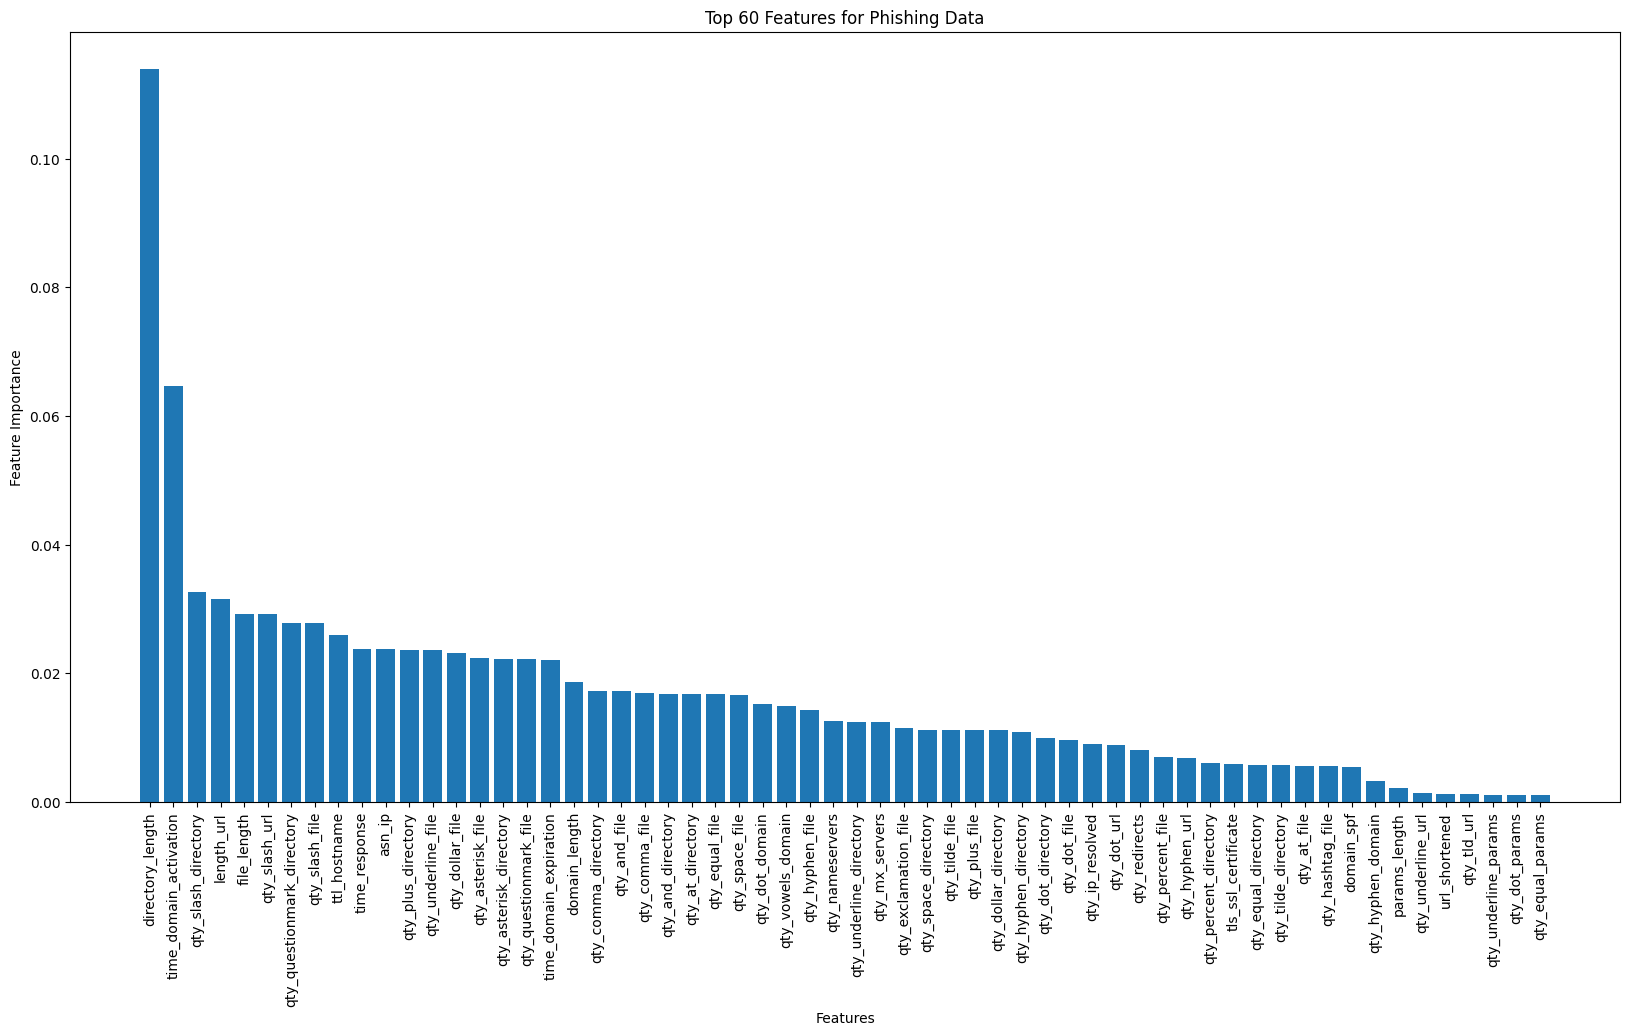

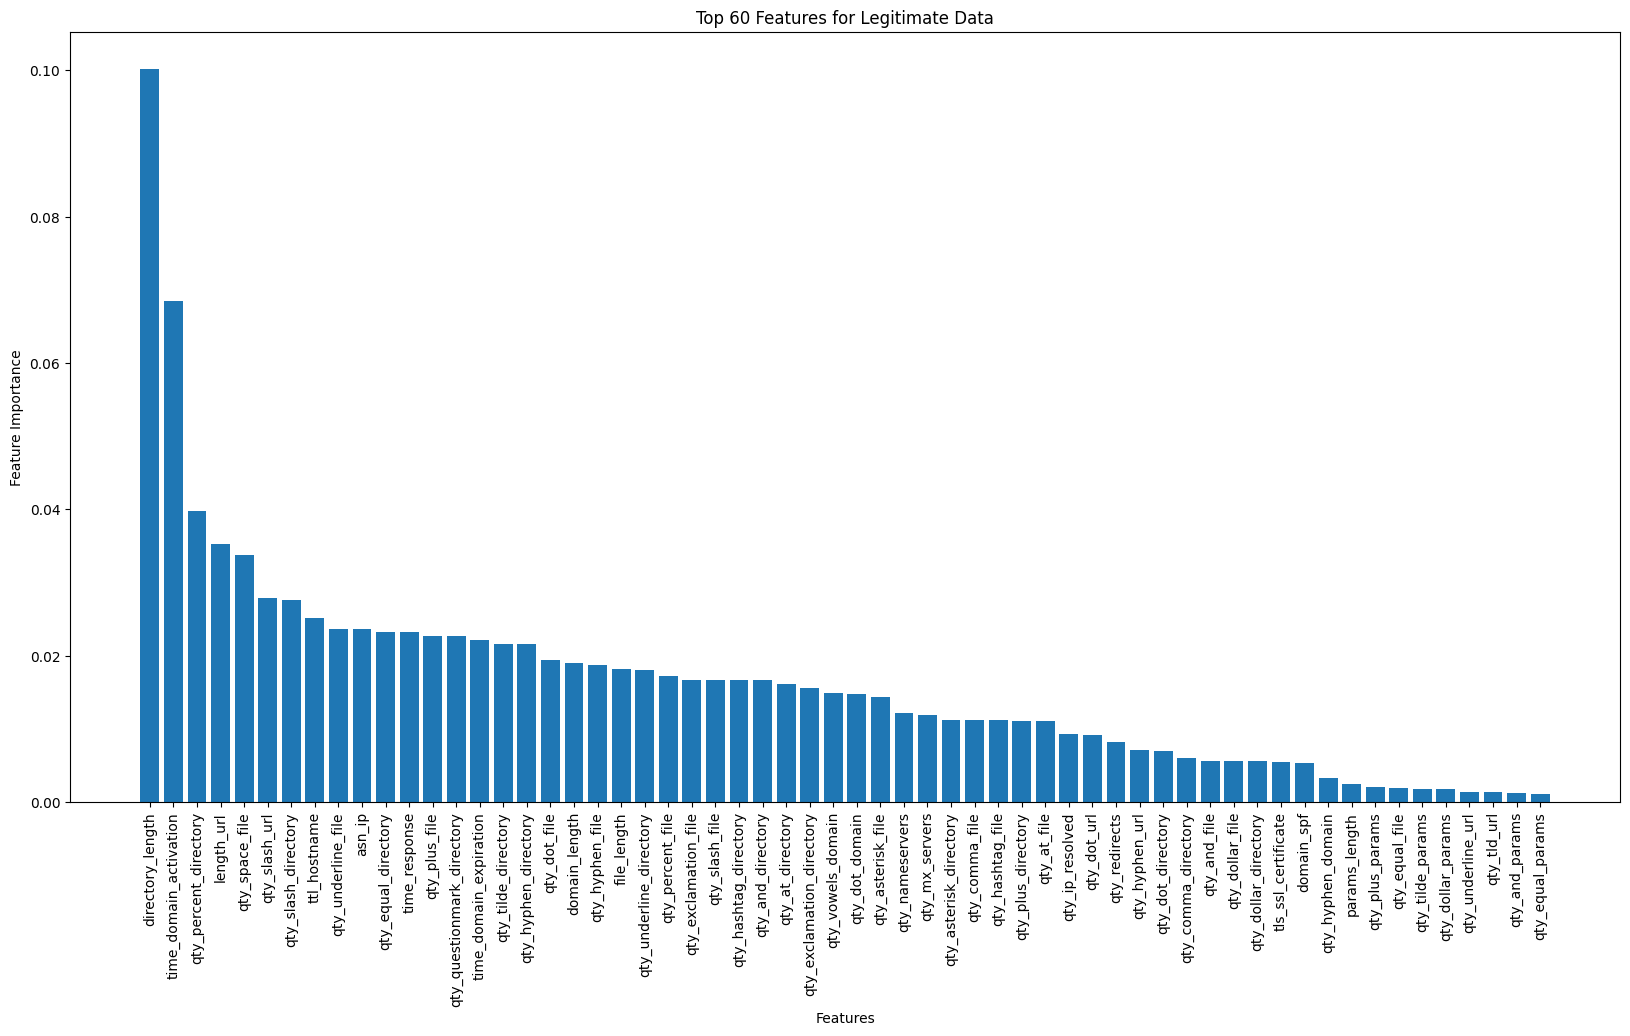

In [ ]:
import matplotlib.pyplot as plt

# sort feature importance values in descending order
phishing_feature_importance_sorted = sorted(phishing_feature_importance, reverse=True)
legitimate_feature_importance_sorted = sorted(legitimate_feature_importance, reverse=True)

# get top 60 feature names for each group
phishing_top_features = features.columns[phishing_feature_importance.argsort()[::-1]][:60]
legitimate_top_features = features.columns[legitimate_feature_importance.argsort()[::-1]][:60]

# plot top 60 features for phishing group
plt.figure(figsize=(20,10))
plt.bar(phishing_top_features, phishing_feature_importance_sorted[:60])
plt.xticks(rotation=90)
plt.title('Top 60 Features for Phishing Data')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

# plot top 60 features for legitimate group
plt.figure(figsize=(20,10))
plt.bar(legitimate_top_features, legitimate_feature_importance_sorted[:60])
plt.xticks(rotation=90)
plt.title('Top 60 Features for Legitimate Data')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()


In [ ]:
# get total feature importance for phishing and legitimate data
phishing_total_importance = sum(phishing_feature_importance_sorted)
legitimate_total_importance = sum(legitimate_feature_importance_sorted)

# print top 60 features for phishing data with percentage
print('Top 60 Features for Phishing Data:\n')
for i in range(60):
    feature_name = phishing_top_features[i]
    feature_importance = phishing_feature_importance_sorted[i]
    feature_percentage = (feature_importance / phishing_total_importance) * 100
    print(f'{i+1}. {feature_name}: {feature_percentage:.2f}%')

# print top 60 features for legitimate data with percentage
print('\nTop 60 Features for Legitimate Data:\n')
for i in range(60):
    feature_name = legitimate_top_features[i]
    feature_importance = legitimate_feature_importance_sorted[i]
    feature_percentage = (feature_importance / legitimate_total_importance) * 100
    print(f'{i+1}. {feature_name}: {feature_percentage:.2f}%')


Top 60 Features for Phishing Data:

1. directory_length: 11.40%
2. time_domain_activation: 6.47%
3. qty_slash_directory: 3.26%
4. length_url: 3.16%
5. file_length: 2.92%
6. qty_slash_url: 2.91%
7. qty_questionmark_directory: 2.79%
8. qty_slash_file: 2.78%
9. ttl_hostname: 2.60%
10. time_response: 2.38%
11. asn_ip: 2.37%
12. qty_plus_directory: 2.36%
13. qty_underline_file: 2.36%
14. qty_dollar_file: 2.31%
15. qty_asterisk_file: 2.24%
16. qty_asterisk_directory: 2.22%
17. qty_questionmark_file: 2.22%
18. time_domain_expiration: 2.20%
19. domain_length: 1.87%
20. qty_comma_directory: 1.72%
21. qty_and_file: 1.72%
22. qty_comma_file: 1.68%
23. qty_and_directory: 1.68%
24. qty_at_directory: 1.67%
25. qty_equal_file: 1.67%
26. qty_space_file: 1.66%
27. qty_dot_domain: 1.52%
28. qty_vowels_domain: 1.49%
29. qty_hyphen_file: 1.42%
30. qty_nameservers: 1.26%
31. qty_underline_directory: 1.24%
32. qty_mx_servers: 1.24%
33. qty_exclamation_file: 1.15%
34. qty_space_directory: 1.12%
35. qty_tilde

In [ ]:
# get total feature importance for phishing and legitimate data
phishing_total_importance = sum(phishing_feature_importance)
legitimate_total_importance = sum(legitimate_feature_importance)

# map top 60 features to original dataset columns
phishing_top_features_mapped = [features.columns.get_loc(feature_name) for feature_name in phishing_top_features]
legitimate_top_features_mapped = [features.columns.get_loc(feature_name) for feature_name in legitimate_top_features]

# sort top features by their appearance in the original dataset
phishing_top_features_sorted = sorted(phishing_top_features_mapped)
legitimate_top_features_sorted = sorted(legitimate_top_features_mapped)

# initialize lists to store top features
phishing_top_features = []
legitimate_top_features = []

# add top 60 features for phishing data to list
for i in range(60):
    feature_index = phishing_top_features_sorted[i]
    feature_name = features.columns[feature_index]
    phishing_top_features.append(feature_name)

# add top 60 features for legitimate data to list
for i in range(60):
    feature_index = legitimate_top_features_sorted[i]
    feature_name = features.columns[feature_index]
    legitimate_top_features.append(feature_name)

# print top 60 features for phishing data with percentage
print('Top 60 Features for Phishing Data:\n')
for i in range(60):
    feature_index = phishing_top_features_sorted[i]
    feature_name = features.columns[feature_index]
    feature_importance = phishing_feature_importance[feature_index]
    feature_percentage = (feature_importance / phishing_total_importance) * 100
    print(f'{i+1}. {feature_name}: {feature_percentage:.2f}%')

# print top 60 features for legitimate data with percentage
print('\nTop 60 Features for Legitimate Data:\n')
for i in range(60):
    feature_index = legitimate_top_features_sorted[i]
    feature_name = features.columns[feature_index]
    feature_importance = legitimate_feature_importance[feature_index]
    feature_percentage = (feature_importance / legitimate_total_importance) * 100
    print(f'{i+1}. {feature_name}: {feature_percentage:.2f}%')
    
# print the list of top 60 features for phishing data
print('\nList of top 60 features for Phishing Data:')
print(phishing_top_features)

# print the list of top 60 features for legitimate data
print('\nList of top 60 features for Legitimate Data:')
print(legitimate_top_features)


Top 60 Features for Phishing Data:

1. qty_dot_url: 0.89%
2. qty_hyphen_url: 0.69%
3. qty_underline_url: 0.14%
4. qty_slash_url: 2.91%
5. qty_tld_url: 0.12%
6. length_url: 3.16%
7. qty_dot_domain: 1.52%
8. qty_hyphen_domain: 0.33%
9. qty_vowels_domain: 1.49%
10. domain_length: 1.87%
11. qty_dot_directory: 0.99%
12. qty_hyphen_directory: 1.09%
13. qty_underline_directory: 1.24%
14. qty_slash_directory: 3.26%
15. qty_questionmark_directory: 2.79%
16. qty_equal_directory: 0.57%
17. qty_at_directory: 1.67%
18. qty_and_directory: 1.68%
19. qty_space_directory: 1.12%
20. qty_tilde_directory: 0.57%
21. qty_comma_directory: 1.72%
22. qty_plus_directory: 2.36%
23. qty_asterisk_directory: 2.22%
24. qty_dollar_directory: 1.11%
25. qty_percent_directory: 0.60%
26. directory_length: 11.40%
27. qty_dot_file: 0.95%
28. qty_hyphen_file: 1.42%
29. qty_underline_file: 2.36%
30. qty_slash_file: 2.78%
31. qty_questionmark_file: 2.22%
32. qty_equal_file: 1.67%
33. qty_at_file: 0.56%
34. qty_and_file: 1.72%

In [ ]:
phishing_top_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_underline_params',
 'qty_equal_params',


In [ ]:
sorted = ['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_underline_params',
 'qty_equal_params',
 'qty_and_params',
 'qty_tilde_params',
 'qty_plus_params',
 'qty_dollar_params',
 'params_length',
 'time_response',
 'domain_spf',
 'asn_ip',
 'time_domain_activation',
 'time_domain_expiration',
 'qty_ip_resolved',
 'qty_nameservers',
 'qty_mx_servers',
 'ttl_hostname',
 'tls_ssl_certificate',
 'qty_redirects',
 'url_shortened']

In [ ]:
df_sorted = data[sorted]
df_sorted.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,...,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_shortened
0,3,0,0,1,1,25,2,0,4,17,...,60781,-1,-1,1,2,0,892,0,0,0
1,5,0,1,3,3,223,2,0,5,16,...,36024,579,150,1,2,1,9540,1,0,0
2,2,0,0,1,1,15,2,0,3,14,...,4766,-1,-1,1,2,3,589,1,0,0
3,4,0,2,5,1,81,2,0,7,19,...,20454,-1,-1,1,2,0,292,1,0,0
4,2,0,0,0,1,19,2,0,5,19,...,53831,6998,306,1,2,1,3597,0,1,0
5,1,0,0,2,1,22,1,0,4,17,...,25535,9,355,1,3,3,3591,1,0,0
6,2,0,0,0,1,27,2,0,9,27,...,13446,-1,-1,1,2,2,291,0,0,0
7,2,0,0,3,1,46,2,0,9,28,...,55053,-1,-1,1,2,1,3134,1,0,0
8,2,0,0,0,1,16,2,0,3,16,...,13335,778,316,1,4,2,3596,1,1,0
9,1,0,0,2,1,24,1,0,4,14,...,20013,4805,307,1,2,1,14397,1,0,0


In [ ]:
df_sorted['phishing'] = data['phishing']

In [ ]:
# Display the unique values for each column
for col in df_sorted.columns:
    print(f"\nUnique values in {col}:")
    print(df_sorted[col].unique())


Unique values in qty_dot_url:
[ 3  5  2  4  1  6  9  7  8 10 12 15 11 14 18 16 20 13 17 23 24 19 22]

Unique values in qty_hyphen_url:
[ 0  1  2  4  3  6  5  8  7 12 10  9 19 11 14 17 15 18 13 20 26 25 35 23
 34 24 21 31 16 27]

Unique values in qty_underline_url:
[ 0  1  2  3  5  4 10  7 21  8 16  6  9 17 12 14 19 11 13 15 18 20]

Unique values in qty_slash_url:
[ 1  3  5  0  2  4  6 10  7 12  9 11  8 14 19 16 18 13 17 44 21 22 15 29
 20]

Unique values in qty_tld_url:
[ 1  3  2  0  4  5 12  7  9]

Unique values in length_url:
[  25  223   15   81   19   22   27   46   16   24   58   45   21   33
  213   13   30   57   17   20   18   23   44   64   70   34   69   14
   12   63   67  238   85   59  237  281   29   96   55    8   36   51
   42   11   37   47   26   97  119  101   31   35   32  102    9   91
   90  153  226   94   79   89  173   41  110   80  104   61   84   28
   38   56   50   40  129   65   43    7   83  175   72  196   49   10
   62  125   66  115   77  100   53   7

In [ ]:
from google.colab import files
df_sorted.to_csv('final_sorted.csv', index=False)

# download the file to your local machine
files.download('final_sorted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('Min-Max Scaler', MinMaxScaler())
])

# define features and target variable
X = df_sorted.drop('phishing', axis=1)
y = df_sorted['phishing']


X_const =constant_pipeline.fit_transform(X)


# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)


# Random forest with hyper parameter tuning:
final_model = RandomForestClassifier(n_estimators=200, max_features=40, max_depth=25, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

print("Final Random Forest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final Random Forest Classifier Accuracy Score (Train) : 0.9993933879284198
Final Random Forest Classifier Accuracy Score (Test) : 0.9778162911611785
Final Random Forest Classifier Cost Metric(Test) : 106060


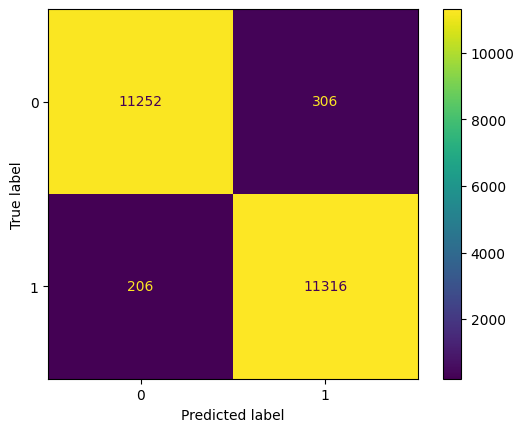

In [ ]:
#ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.show()

In [ ]:
!pip install whois tld dnspython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import whois
import os
import dns.resolver
import requests
import time
import socket
import ssl
import re
import urllib
import urllib.request
import urllib.parse
from urllib.parse import urlparse, parse_qs
import tldextract
from tld import get_tld
from datetime import datetime, timedelta
import json
import datetime

features = []


# Define a function to extract features from the URL


def extract_features(url):
    
    # Dataset attributes based on URL.
    
    # Feature 1: qty_dot_url
    try:
        features.append(url.count('.') if '.' in url else 0)
    except:
        features.append(0)

    # Feature 2: qty_hyphen_url
    try:
        features.append(url.count('-') if '-' in url else 0)
    except:
        features.append(0)


    # Feature 2: qty_underline_url
    try:
        features.append(url.count('_') if '_' in url else 0)
    except:
        features.append(0)


    # Feature 4: qty_slash_url
    try:
        features.append(url.count('/') if '/' in url else 0)
        
    except:
        features.append(0)


    # Feature 18: qty_tld_url
    domain = tldextract.extract(url).domain
    suffix = tldextract.extract(url).suffix
    
    if suffix:
        features.append(len(domain + suffix) - len(suffix))
        
    elif not suffix:
        features.append(len(domain))
        
    else:
        features.append(0)
    
    # Feature 19: length_url
    try:
        features.append(len(url))
        
    except:
        features.append(0)

    # Dataset attributes based on domain URL
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    
    # Feature 20: qty_dot_domain
    try:
        features.append(domain.count('.') if '.' in domain else 0)
        
    except:
        features.append(0)
    
    
    # Feature 21: qty_hyphen_domain
    try:
        features.append(domain.count('-') if '-' in domain else 0)
        
    except:
        features.append(0)
          
    
    # Feature 37: qty_vowels_domain
    try:
        vowels = set(['a', 'e', 'i', 'o', 'u', 'A','E','I','O','U'])
        qty_vowels = sum(1 for c in domain if c in vowels)
        features.append(qty_vowels)
        
    except:
        features.append(0)
    
    
    # Feature 38: domain_length
    try:
        features.append(len(domain) if domain else 0)
        
    except:
        features.append(0)
  
        
## Dataset attributes based on URL directory.
    
    parsed_url = urlparse(url)
    # url_Path = Directory
    url_path = parsed_url.path.rsplit('/', 1)[0]

    if not url_path or url_path == '/':
      url_path = -1
      qty = 0
      for qty in range(18):
        features.append(-1)

    else: 
      # Feature 41: qty_dot_directory
      features.append(url_path.count('.') if '.' in url_path else 0)
           
      # Feature 42: qty_hyphen_directory
      features.append(url_path.count('-') if '-' in url_path else 0)
          
      # Feature 43: qty_underline_directory
      features.append(url_path.count('_') if '_' in url_path else 0)
               
      # Feature 44: qty_slash_directory
      features.append(url_path.count('/') if '/' in url_path else 0)

      # Feature 45: qty_questionmark_directory
      features.append(url_path.count('?') if '?' in url_path else 0)

      # Feature 46: qty_equal_directory
      features.append(url_path.count('=') if '=' in url_path else 0) 

      # Feature 47: qty_at_directory
      features.append(url_path.count('@') if '@' in url_path else 0)   

      # Feature 48: qty_and_directory
      features.append(url_path.count('&') if '&' in url_path else 0)  

      # Feature 49: qty_exclamation_directory
      features.append(url_path.count('!') if '!' in url_path else 0)

      # Feature 50: qty_space_directory
      features.append(url_path.count(' ') if ' ' in url_path else 0)    

      # Feature 51: qty_tilde_directory
      features.append(url_path.count('~') if '~' in url_path else 0)   

      # Feature 52: qty_comma_directory 
      features.append(url_path.count(',') if ',' in url_path else 0) 

      # Feature 53: qty_plus_directory
      features.append(url_path.count('+') if '+' in url_path else 0)   

      # Feature 54: qty_asterisk_directory
      features.append(url_path.count('*') if '*' in url_path else 0)   

      # Feature 55: qty_hashtag_directory
      features.append(url_path.count('#') if '#' in url_path else 0)

      # Feature 56: qty_dollar_directory
      features.append(url_path.count('$') if '$' in url_path else 0)  

      # Feature 57: qty_percent_directory
      features.append(url_path.count('%') if '%' in url_path else 0)

      # Feature 58: directory_length 
      features.append(len(url_path) if url_path else 0)
             
## Dataset attributes based on URL ﬁle name.

    file_name = os.path.basename(urlparse(url).path)

    if not file_name or file_name == '/':
      file_name = -1
      qty = 0
      for qty in range(18):
        features.append(-1)

    else: 
      # Feature 59: qty_dot_file
      features.append(file_name.count('.') if '.' in file_name else 0)
           
      # Feature 60: qty_hyphen_file
      features.append(file_name.count('-') if '-' in file_name else 0)
          
      # Feature 61: qty_underline_file
      features.append(file_name.count('_') if '_' in file_name else 0)
               
      # Feature 62: qty_slash_file
      features.append(file_name.count('/') if '/' in file_name else 0)

      # Feature 63: qty_questionmark_file
      features.append(file_name.count('?') if '?' in file_name else 0)

      # Feature 64: qty_equal_file
      features.append(file_name.count('=') if '=' in file_name else 0) 

      # Feature 65: qty_at_file
      features.append(file_name.count('@') if '@' in file_name else 0)   

      # Feature 66: qty_and_file
      features.append(file_name.count('&') if '&' in file_name else 0)  

      # Feature 67: qty_exclamation_file
      features.append(file_name.count('!') if '!' in file_name else 0)

      # Feature 68: qty_space_file
      features.append(file_name.count(' ') if ' ' in file_name else 0)    

      # Feature 69: qty_tilde_file
      features.append(file_name.count('~') if '~' in file_name else 0)   

      # Feature 70: qty_comma_file 
      features.append(file_name.count(',') if ',' in file_name else 0) 

      # Feature 71: qty_plus_file
      features.append(file_name.count('+') if '+' in file_name else 0)   

      # Feature 72: qty_asterisk_file
      features.append(file_name.count('*') if '*' in file_name else 0)   

      # Feature 73: qty_hashtag_file
      features.append(file_name.count('#') if '#' in file_name else 0)

      # Feature 74: qty_dollar_file
      features.append(file_name.count('$') if '$' in file_name else 0)  

      # Feature 75: qty_percent_file
      features.append(file_name.count('%') if '%' in file_name else 0)

      # Feature 76: file_length 
      features.append(len(file_name) if file_name else 0)
       
    
## Dataset attributes based on URL parameters.

    params = urlparse(url).query

    if not params or params == None:
        params = -1
        qty = 0
        for qty in range(8):
          features.append(-1)
    else:
    
      # Feature 77: qty_dot_params
      features.append(params.count('.'))
      
      # Feature 79: qty_underline_params
      features.append(params.count('_'))
        
      # Feature 82: qty_equal_params
      features.append(params.count('='))
          
      # Feature 84: qty_and_params
      features.append(params.count('&'))
          
      # Feature 87: qty_tilde_params
      features.append(params.count('~'))
          
      # Feature 89: qty_plus_params
      features.append(params.count('+'))
      
      # Feature 92: qty_dollar_params
      features.append(params.count('$'))
          
      # Feature 94: params_length_characters
      features.append(len(params))
          
              
## Dataset attributes based on resolving URL and external services.

    # Extract domain name
    parsed_url = urllib.parse.urlparse(url)
    domain = parsed_url.netloc

    # Feature 98: Time to response
    try:
        start = time.time()
        response = requests.get(url, timeout=5)
        end = time.time()
        features.append(end - start)
    except:
        features.append(0.207 if not None else 0.207)
    
    # Feature 99: Presence of SPF record
    try:
        spf = dns.resolver.resolve(domain, 'TXT').response.answer[0][0].to_text()
        if 'v=spf' in spf:
            features.append(1)
        else:
            features.append(0)
    except:
        features.append(-1)
    
    # Feature 100: Autonomous System Number (ASN) of IP address
    try:
        ip = socket.gethostbyname(urlparse(url).netloc)
        asn = requests.get(f"https://ipapi.co/{ip}/asn/").text.strip()
        features.append(asn.strip('AS')) if asn else asn.strip('AS')
    except:
        features.append(0)

    # Feature 101: Time to domain activation
    try:
        domain = whois.whois(url)
        creation_date = domain.creation_date
        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        features.append((datetime.datetime.now() - creation_date).days)
            
    except:
        features.append(-1)
    
    # Feature 102: Time to domain expiration
    try:
        expiration_date = whois.whois(domain).expiration_date
        today = datetime.datetime.now()
        features.append((expiration_date - today).days)           
    except:
        features.append(-1)
    
    # Feature 103: Quantity of resolved IPs
    try:
        ip_list = socket.getaddrinfo(domain, None)
        features.append(len(ip_list))
    except:
        features.append(-1)
    
    # Feature 104: Quantity of name servers
    try:
        domain = tldextract.extract(url).registered_domain
        ns_list = dns.resolver.resolve(domain, 'NS')
        features.append(len(ns_list))
    except:
        features.append(0)
    
    # Feature 105: Quantity of MX servers
    try:
        domain = tldextract.extract(url).registered_domain
        mx_list = dns.resolver.resolve(domain, 'MX')
        features.append(len(mx_list))
    except:
        features.append(0)
    
    # Feature 106: TTL value of hostname
    try:
        domain = tldextract.extract(url).registered_domain
        ttl = dns.resolver.resolve(domain, 'NS').rrset.ttl
        features.append(ttl)
    except:
        features.append(0)
    
    # Feature 107: Presence of TLS/SSL certificate
    try:
        with socket.create_connection((urlparse(url).netloc, 443)) as sock:
            with ssl.create_default_context().wrap_socket(sock, server_hostname=urlparse(url).netloc) as ssock:
                cert = ssock.getpeercert()
                if cert:
                    features.append(1)
                else:
                    features.append(0)
    except (ssl.SSLError, socket.gaierror, ConnectionRefusedError, TimeoutError):
        features.append(0)
    except Exception:
        features.append(0)
    
    # Feature 108: Number of redirects
    try:
        response = requests.get(url)
        if not response:
          features.append(-1)
        else:
          features.append(len(response.history))
    except:
        features.append(-1)


    # Feature 111: URL shortened
    response = requests.get(url, allow_redirects=False)

    if 'location' in response.headers:
        location = response.headers['location']
        if url.split('/')[2] != location.split('/')[2]:
            features.append(1)
        else:
            features.append(0)
    else:
        features.append(0)
        
    
    return features

    

In [ ]:
columns = ['qty_dot_url','qty_hyphen_url','qty_underline_url','qty_slash_url','qty_tld_url','length_url','qty_dot_domain','qty_hyphen_domain','qty_vowels_domain','domain_length','qty_dot_directory','qty_hyphen_directory','qty_underline_directory','qty_slash_directory','qty_questionmark_directory','qty_equal_directory','qty_at_directory','qty_and_directory','qty_exclamation_directory','qty_space_directory','qty_tilde_directory','qty_comma_directory','qty_plus_directory','qty_asterisk_directory','qty_hashtag_directory','qty_dollar_directory','qty_percent_directory','directory_length','qty_dot_file','qty_hyphen_file','qty_underline_file','qty_slash_file','qty_questionmark_file','qty_equal_file','qty_at_file','qty_and_file','qty_exclamation_file','qty_space_file','qty_tilde_file','qty_comma_file','qty_plus_file','qty_asterisk_file','qty_hashtag_file','qty_dollar_file','qty_percent_file','file_length','qty_dot_params','qty_underline_params','qty_equal_params','qty_and_params','qty_tilde_params','qty_plus_params','qty_dollar_params','params_length','time_response','domain_spf','asn_ip','time_domain_activation','time_domain_expiration','qty_ip_resolved','qty_nameservers','qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_shortened']


In [ ]:
columns

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot